In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
pip install fastbook

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 4.5 MB/s eta 0:00:0000:0100:01m
Note: you may need to restart the kernel to use updated packages.


In [3]:
#hide
from fastbook import *
from fastai.vision.widgets import *

!pip install -Uqq duckduckgo_search

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


In [4]:
frogIms = search_images_ddg('frog')
monkeyIms = search_images_ddg('monkey')
len(frogIms)

200

In [5]:
imagesPath = Path('images')
frogPath = Path('images/frogs')
monkeyPath = Path('images/monkeys')

In [6]:
if not imagesPath.exists():
    imagesPath.mkdir()

In [7]:
if not frogPath.exists():
    frogPath.mkdir()
    download_images(frogPath, urls=frogIms)
if not monkeyPath.exists():
    monkeyPath.mkdir()
    download_images(monkeyPath, urls=monkeyIms)


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


In [8]:
fns = get_image_files(Path('images'))
fns

(#359) [Path('images/frogs/5635022d-fa9d-428d-8a83-2229308dea53.jpg'),Path('images/frogs/1398cc13-7a34-4c04-b6f5-da5e1fe61c48.jpg'),Path('images/frogs/754e1dae-a1bc-4046-ba02-d43da305752e.jpg'),Path('images/frogs/60f5531f-611f-430f-bdde-188747b4fd1f.jpg'),Path('images/frogs/7ac0ec76-fb3d-4b63-8b41-5dd6e6413191.jpg'),Path('images/frogs/ef670ee7-6606-4d5d-bbca-a727940b40c2.jpg'),Path('images/frogs/fcf92ec2-cfed-4c22-8c7a-9d5061208a9e.jpg'),Path('images/frogs/f18abe33-f11b-4b3c-ba7e-10822230f810.jpg'),Path('images/frogs/0f81dd0f-8ecb-4b88-b627-0f36e8e01393.jpg'),Path('images/frogs/49a1f159-501f-4585-9789-2b30600dd7ad.jpg')...]

In [9]:
failed = verify_images(fns)
failed

(#17) [Path('images/frogs/6dc4c96d-94ac-4459-918f-546339221a1b.jpg'),Path('images/frogs/b951307d-e0b4-48b8-8264-9e649b05b9ef.jpg'),Path('images/frogs/7e7cf82e-e45f-45c4-a280-349218da3f10.jpg'),Path('images/frogs/4ee9392d-cfae-45b0-8a01-299735f3ff05.jpg'),Path('images/frogs/188576c2-7865-49f1-aa2d-fbfdffb6ad35.jpg'),Path('images/frogs/81bce4dc-c610-4eb5-8410-6adf1a25539c.jpg'),Path('images/frogs/3866b52a-550c-4245-b66e-49907bb1c540.jpg'),Path('images/frogs/deba5824-e4fd-470b-9382-79868b703fb5.jpg'),Path('images/frogs/dadef10a-301f-49e8-85e2-2b282a9cc77e.jpg'),Path('images/frogs/e24640a6-9e91-49f6-b639-0dd9a427ef99.jpg')...]

In [10]:
failed.map(Path.unlink)

(#17) [None,None,None,None,None,None,None,None,None,None...]

In [11]:
frogOrMonkeys = DataBlock(
blocks=(ImageBlock, CategoryBlock),
get_items=get_image_files,
splitter=RandomSplitter(valid_pct=0.2, seed=42),
get_y=parent_label,
item_tfms=Resize(128))

In [12]:
dls = frogOrMonkeys.dataloaders(imagesPath)

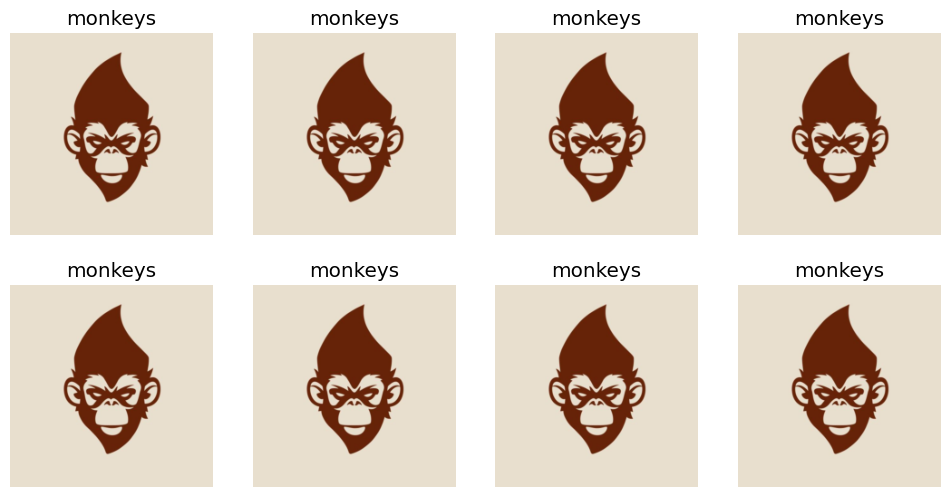

In [21]:
frogOrMonkeys = frogOrMonkeys.new(item_tfms=RandomResizedCrop(224, min_scale=0.3))
dls = frogOrMonkeys.dataloaders(imagesPath)
dls.valid.show_batch(max_n=8, nrows=2, unique=True)

In [22]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 110MB/s] 


epoch,train_loss,valid_loss,error_rate,time
0,0.804892,0.052622,0.014706,00:55


epoch,train_loss,valid_loss,error_rate,time
0,0.186335,0.037639,0.000000,01:18
1,0.128728,0.010471,0.000000,01:16
2,0.092768,0.010755,0.000000,01:17
3,0.071062,0.017000,0.000000,01:15


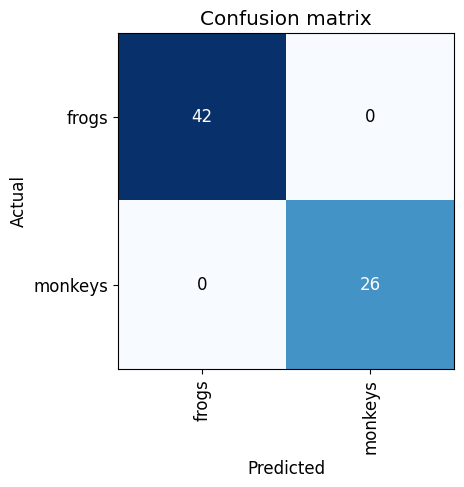

In [23]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [24]:
learn.export()

In [25]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [26]:
learn_inf = load_learner(path/'export.pkl')
